# Feature Engineering

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# !pip install shap

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 435.6/435.6 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 14.0/14.0 MB 4.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.2
    Uninstalling numpy-1.23.2:
      Successfully uninstalled numpy-1.23.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.


# data loading and model train

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# California Housing Prices
dataset = fetch_california_housing(as_frame = True)
X = dataset['data']
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# Prepares a default instance of the random forest regressor
model = RandomForestRegressor()
# Fits the model on the data
model.fit(X_train, y_train)

RandomForestRegressor()

In [17]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [14]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [55]:
# convert numpy ndarray to dataframe
Target_y= pd.DataFrame(y)
Target_y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [56]:
# Combining dataframes
# Place the DataFrames side by side
Data_X_y = pd.concat([X, Target_y], axis=1)
Data_X_y.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Correlation analysis

In [57]:
corr=Data_X_y.corr()

In [58]:
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<AxesSubplot:>

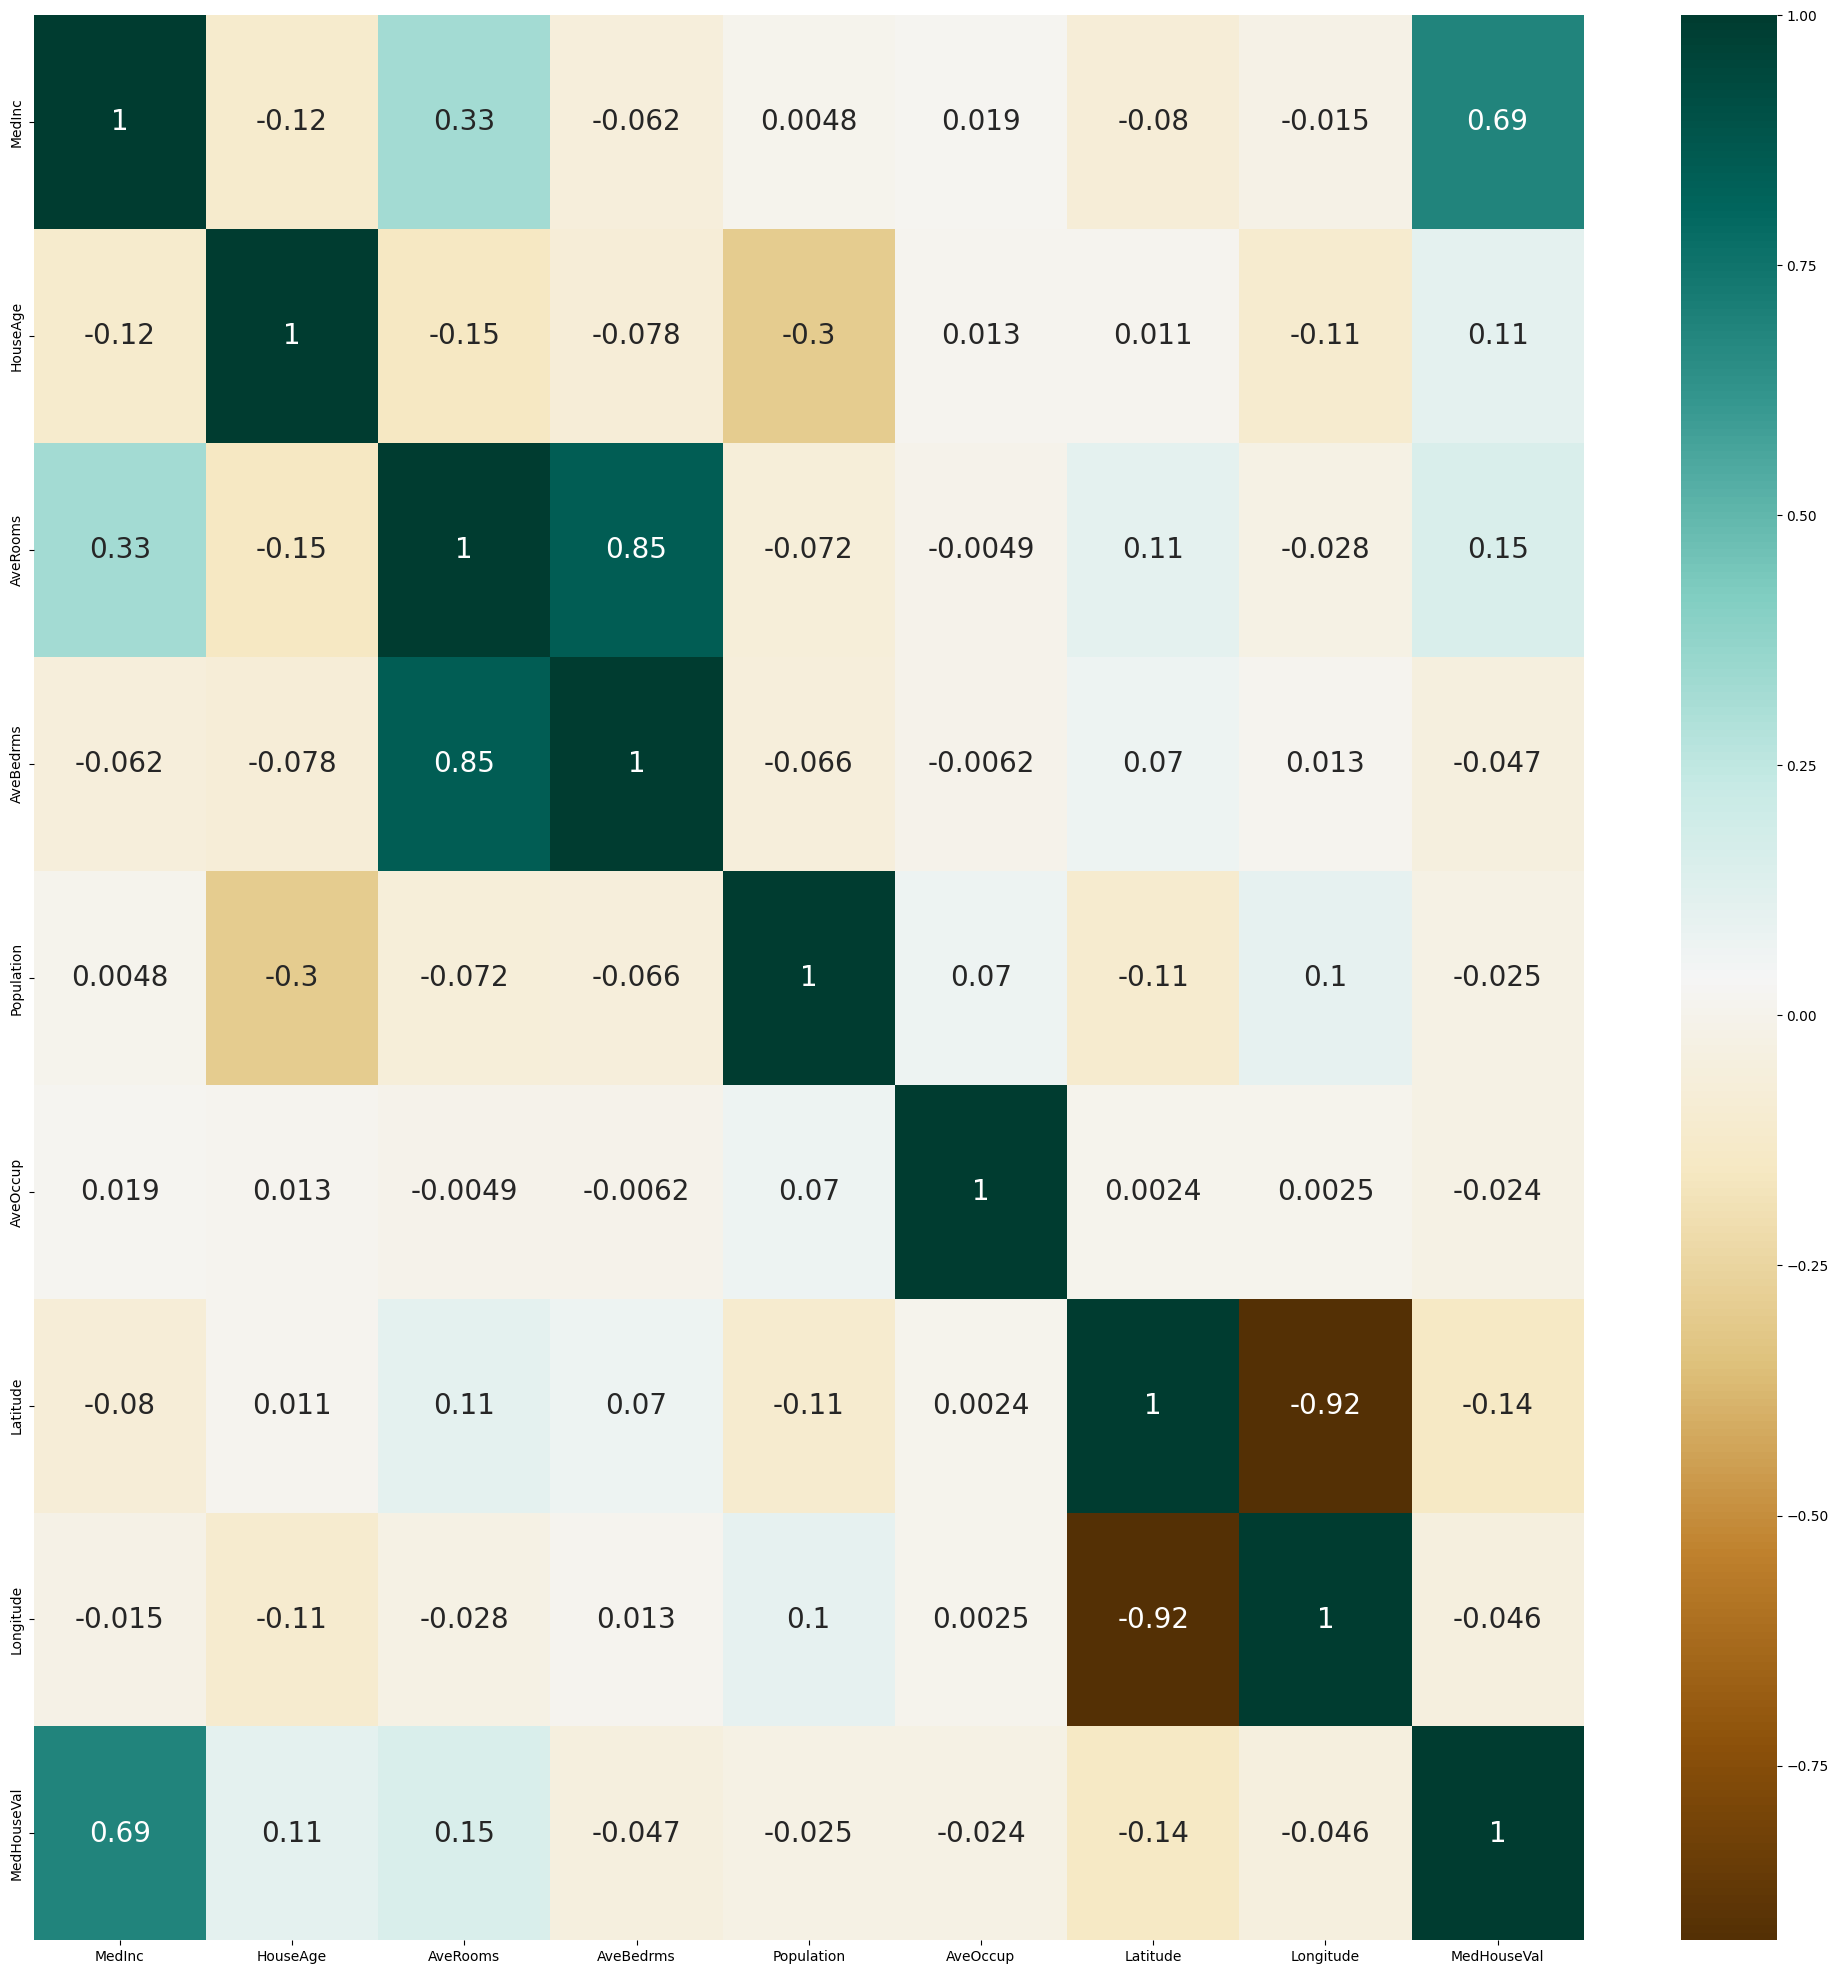

In [61]:
plt.figure(figsize=(25,25))
sns.heatmap(corr,cbar=True,annot=True,annot_kws={'size':20},cmap='BrBG')

# SHAP

In [5]:
import shap

# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

Exact explainer: 4129it [29:59,  2.29it/s]                                                                             


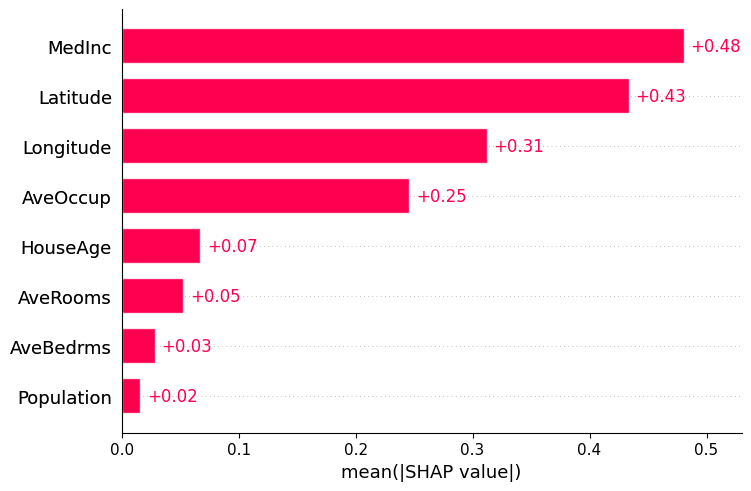

In [6]:
shap.plots.bar(shap_values)

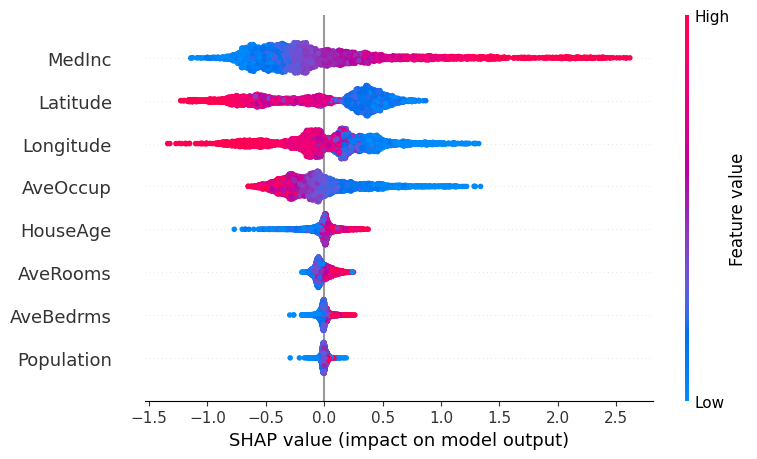

In [11]:
shap.summary_plot(shap_values,X_test)

# RFE Recursive feature Elimination

In [19]:
#!pip install feature_engine

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 290.0/290.0 kB 1.1 MB/s eta 0:00:00


In [20]:
#Feature engineering with RFE
from feature_engine.selection import RecursiveFeatureElimination

In [34]:
#Feature Engine for XGB based on ROC-AUC
RFE_model_RFReg = RecursiveFeatureElimination(
    estimator = RandomForestRegressor(), 
    scoring = 'r2',
    threshold = 0.01, 
    cv=2)

X_check0_RFReg=RFE_model_RFReg.fit(X_test, y_test)


RFE_model_RFReg.initial_model_performance_

0.7465705597094137

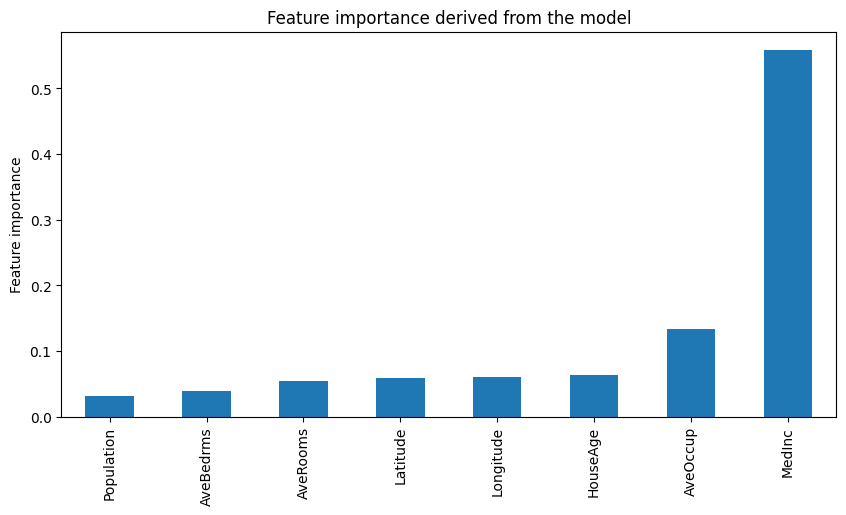

In [38]:
#Plot Feature importance derived from the XGBoost_Model3
RFE_model_RFReg.feature_importances_.plot.bar(figsize=(10, 5))
plt.ylabel('Feature importance')
plt.title('Feature importance derived from the model')
plt.show()

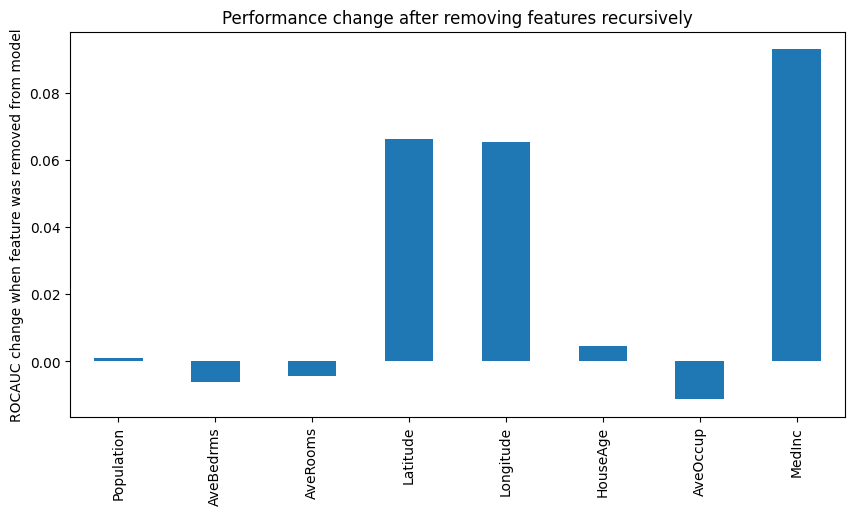

In [39]:
#Plot Feature importance derived from the XGBoost_Model3
pd.Series(RFE_model_RFReg.performance_drifts_).plot.bar(figsize=(10, 5))
plt.title('Performance change after removing features recursively')
plt.ylabel('ROCAUC change when feature was removed from model')
plt.show()